## Tutorial notebook on how to use the CLMS Data Store and its preload_data method

This notebook shows the preloading of pre-packaged non-EEA datasets (LEGACY) from the CLMS API that returns a list of download URLs from CLMS API that are then downloaded, preprocessed and finally stored as `.zarr` file for efficient processing.

### Setup
In order to run this notebook, you need to install [`xcube_clms`](https://github.com/xcube-dev/xcube-clms). You can install it following either of the steps below:

1. via `conda-forge`
```bash
conda env create -f environment.yml
conda activate xcube-clms
conda install xcube-clms
```

2. via Development mode

```bash
git clone https://github.com/xcube-dev/xcube-clms.git
cd xcube-clms
conda env create -f environment.yml
conda activate xcube-clms
pip install .
```


Note that [`xcube_clms`](https://github.com/xcube-dev/xcube-clms) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

You also need the credentials from the Land Monitoring service. Please follows the steps outlined [`here`](https://eea.github.io/clms-api-docs/authentication.html) to download your credentials and place them in the same directory as this notebook.

In [1]:
%%time
import json

from xcube.core.store import new_data_store

CPU times: user 2.45 s, sys: 246 ms, total: 2.69 s
Wall time: 1.31 s


To get the credentials.json, please follow the steps outlined [here](https://eea.github.io/clms-api-docs/authentication.html)

In [2]:
%%time
json_file_path = "credentials.json"
with open(json_file_path, "r") as j:
    credentials = json.loads(j.read())

CPU times: user 574 μs, sys: 70 μs, total: 644 μs
Wall time: 439 μs


When the user creates a new CLMS data store, it already sends requests to the CLMS API to get the catalog information which takes around 15-20 seconds. If no path is provided for the cache location, it will create a `clms_cache/` in the current directory to store all the downloaded data and initialize a local file store

In [3]:
%%time
clms_data_store = new_data_store("clms", credentials=credentials)

CPU times: user 255 ms, sys: 79.9 ms, total: 334 ms
Wall time: 24 s


The `Cache Store` within the CLMS data store is another data store which can be any user-defined data store. It defaults to the `file` store. Use `cache_id` and `cache_params` to provide information about the data store you would like to use for caching the preloaded data 

In [4]:
%%time
clms_data_store.list_data_ids(include_attrs=True)

CPU times: user 7.84 ms, sys: 977 μs, total: 8.82 ms
Wall time: 8.79 ms


[('lake-ice-extent-europe-v2-250m',
  {'@id': 'bec918b1-0ac9-4a8f-8973-a88393c37905',
   'collection': '250m',
   'full_format': 'Netcdf',
   'full_path': 'https://globalland.vito.be/download/manifest/lie_250m_v2_daily_netcdf/manifest_clms_global_lie_250m_v2_daily_netcdf_latest.txt',
   'full_source': 'LEGACY',
   'layers': ['ALL BANDS'],
   'name': 'RASTER',
   'wekeo_choices': ''}),
 ('lake-water-quality-near-real-time-v2-0-300m',
  {'@id': '8fa1dbba-3898-4eb7-b84c-643c283246ca',
   'collection': '300m',
   'full_format': 'Netcdf',
   'full_path': 'https://globalland.vito.be/download/manifest/lwq_300m_v2_10daily-nrt_netcdf/manifest_clms_global_lwq_300m_v2_10daily-nrt_netcdf_latest.txt',
   'full_source': 'LEGACY',
   'layers': ['ALL BANDS'],
   'name': 'RASTER'}),
 ('clc-backbone-2021|CLMS_CLCplus_RASTER_2021',
  {'@id': 'b813d203-d09b-4663-95f7-65dc6d53789e',
   'area': 'Europe',
   'file': 'CLMS_CLCplus_RASTER_2021',
   'format': 'Geotiff',
   'path': 'H:\\Corine_Land_Cover_Backbon

In [5]:
%%time
clms_data_store.cache_store.root

CPU times: user 8 μs, sys: 0 ns, total: 8 μs
Wall time: 10.3 μs


'/home/yogesh/Projects/BC/xcube-clms/examples/notebooks/clms_cache'

In [6]:
%%time
clms_data_store.get_data_store_params_schema()

CPU times: user 40 μs, sys: 0 ns, total: 40 μs
Wall time: 42 μs


With the following command, the users can see how the `data_ids` look like for the CLMS store.

In [7]:
%%time
clms_data_store.list_data_ids()

CPU times: user 2.15 ms, sys: 19 μs, total: 2.17 ms
Wall time: 2.18 ms


['lake-ice-extent-europe-v2-250m',
 'lake-water-quality-near-real-time-v2-0-300m',
 'clc-backbone-2021|CLMS_CLCplus_RASTER_2021',
 'burnt-area-v3-1-daily-300m',
 'clc-backbone-2018|CLMS_CLCplus_RASTER_2018_010m_eu_03035_V1_1',
 'forest-type-2015|FTY_2015_100m_eu_03035_d02_Full',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_Full',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E00N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E10N00',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E10N10',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E10N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N10',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N30',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N40',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E20N50',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N10',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N20',
 'forest-type-2015|FTY_2015_020m_eu_03035_d04_E30N30',
 'fores

In [8]:
%%time
clms_data_store.get_data_opener_ids()

CPU times: user 5 μs, sys: 0 ns, total: 5 μs
Wall time: 7.63 μs


('dataset:zarr:file',)

In [9]:
%%time
clms_data_store.get_data_types()

CPU times: user 6 μs, sys: 1e+03 ns, total: 7 μs
Wall time: 9.54 μs


('dataset',)

In [10]:
%%time
clms_data_store.get_preload_data_params_schema()

CPU times: user 47 μs, sys: 0 ns, total: 47 μs
Wall time: 50.1 μs


In [11]:
%%time
clms_data_store.describe_data("daily-surface-soil-moisture-v1.0")

CPU times: user 183 μs, sys: 0 ns, total: 183 μs
Wall time: 186 μs


In [12]:
%%time
dataset_to_preload = ("daily-surface-soil-moisture-v1.0",)

CPU times: user 2 μs, sys: 1e+03 ns, total: 3 μs
Wall time: 4.29 μs


When the user runs the `preload_data` method, it returns a new cache data store with which the user can view its status using table provided via the returned `.preload_handle`, which indicates the status of the download request along with its progress, messages and exceptions, if any. It can be run in both blocking and non-blocking way. The user can silent the progress using the silent flag. The user can also choose to cleanup the downloads.

In [14]:
%%time
cache_data_store = clms_data_store.preload_data(
    *dataset_to_preload,
    blocking=True,  # Defaults to True
    cleanup=True,  # Defaults to True,
    silent=False,  # Defaults to False
    tile_size=2000,  # Defaults to 2000. You can pass a single integer, or a tuple of (int, int)
)

Error downloading https://globalland.vito.be/download/netcdf/surface_soil_moisture/ssm_1km_v1_daily/2019/20191213/c_gls_SSM1km_201912130000_CEURO_S1CSAR_V1.1.1.nc: HTTPSConnectionPool(host='globalland.vito.be', port=443): Read timed out.
Setting 'force_new' is enabled. This will permanently delete existing targets (no rollback).
/home/yogesh/miniforge3/envs/xcube-clms/lib/python3.13/site-packages/zappend/processor.py:151: FutureWarning: zarr_version is deprecated, use zarr_format
  target_ds.to_zarr(


CPU times: user 6h 17min 50s, sys: 1h 46min 45s, total: 8h 4min 36s
Wall time: 3h 5min 15s


In [15]:
%%time
handle = cache_data_store.preload_handle
handle

CPU times: user 19 μs, sys: 5 μs, total: 24 μs
Wall time: 28.6 μs


Data ID,Status,Progress,Message,Exception
daily-surface-soil-moisture-v1.0,STOPPED,100%,Preloading complete.,-


In [16]:
cache_data_store.list_data_ids()

['daily-surface-soil-moisture-v1.0.zarr']

Now that the preload is completed, the user can open the data using open_data as usual which uses the file data store underneath at the cache location

In [17]:
cache_data_store.get_open_data_params_schema()

In [18]:
cache_data_store.get_open_data_params_schema(
    "daily-surface-soil-moisture-v1.0.zarr"
)

In [19]:
%%time
dss = cache_data_store.open_data(
    "daily-surface-soil-moisture-v1.0.zarr"
)
dss

CPU times: user 8.07 ms, sys: 1.74 ms, total: 9.8 ms
Wall time: 9.77 ms


<xarray.Dataset> Size: 2TB
Dimensions:    (lat: 4144, lon: 6832, time: 3859)
Coordinates:
  * lat        (lat) float64 33kB 72.0 71.99 71.98 71.97 ... 35.02 35.01 35.0
  * lon        (lon) float64 55kB -11.0 -10.99 -10.98 ... 49.98 49.99 50.0
  * time       (time) datetime64[ns] 31kB 2014-10-03 2014-10-04 ... 2025-06-16
Data variables:
    crs        |S1 1B ...
    ssm        (time, lat, lon) float64 874GB dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
    ssm_noise  (time, lat, lon) float64 874GB dask.array<chunksize=(1, 2000, 2000), meta=np.ndarray>
Attributes: (12/26)
    Conventions:               CF-1.6
    archive_facility:          VITO
    copyright:                 Copernicus Service information 2019
    geospatial_lat_max:        72.0
    geospatial_lat_min:        35.0
    geospatial_lon_max:        50.0
    ...                        ...
    region_name:               CEURO
    sensor:                    CSAR
    source:                    Derived from EO radar observations
    time_coverage_end:         2014-10-03T23:59:59Z
    time_coverage_start:       2014-10-03T00:00:00Z
    title:                     Daily Surface Soil Moisture 1km: CEURO 2014-10...

CPU times: user 609 ms, sys: 111 ms, total: 721 ms
Wall time: 1.11 s


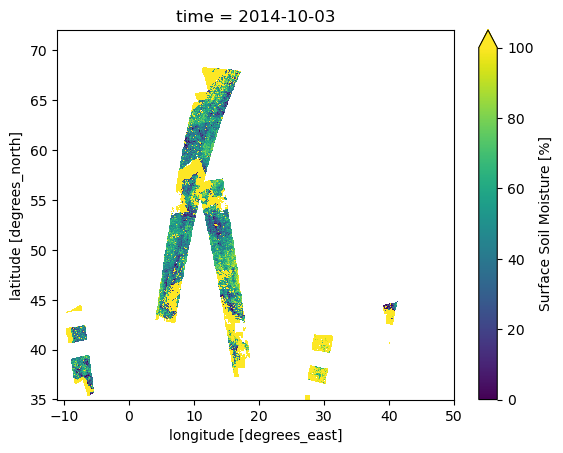

In [20]:
%%time
downsampled_cube = dss.isel(
    lon=slice(None, None, 10),
    lat=slice(None, None, 10),
)
downsampled_cube.ssm.isel(time=0).plot(vmin=0, vmax=100)

CPU times: user 1.77 s, sys: 34.5 ms, total: 1.81 s
Wall time: 1.78 s


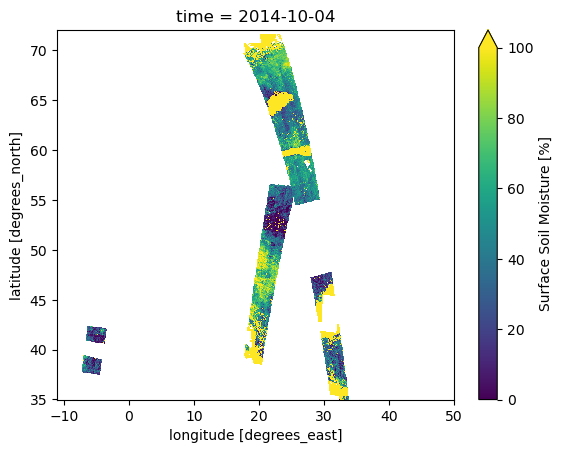

In [21]:
%%time
downsampled_cube = dss.isel(
    lon=slice(None, None, 10),
    lat=slice(None, None, 10),
)
downsampled_cube.ssm.isel(time=1).plot(vmin=0, vmax=100)

Execute the following command to terminate the preload job and trigger the cleanup process to clean the `downloads` directory. This step is only necessary if the preload job was originally run with `cleanup=False`, as downloads will not be removed automatically in that case. If `cleanup=True` was used (which is the default), the cleanup is performed automatically upon completion of the preload job.

In [24]:
handle.close()
handle

Data ID,Status,Progress,Message,Exception
tree-cover-density-2015|TCD_2015_100m_eu_03035_d04_Full,STOPPED,100%,Cleaning up Finished.,-
forest-type-2015|FTY_2015_100m_eu_03035_d02_Full,STOPPED,100%,Cleaning up Finished.,-
dominant-leaf-type-change-2015-2018|DLTC_1518_020m_eu_03035_v010,STOPPED,100%,Cleaning up Finished.,-
